# Exercise: Hierarchical Cluster Analysis
You are provided with a dataset containing demographic indicators for 36 European countries. These include variables such as:

- birth and death rates  
- male and female life expectancy  
- total population and population density

Your goal is to uncover clusters of countries that share similar demographic profiles. To do this, proceed as follows:

- Design and implement a **machine learning pipeline** that prepares your data for clustering.
- Use **PCA** to reduce the dimensionality of the data and support your interpretation.
- Apply **hierarchical clustering** to identify meaningful groups of countries.
- Visualize your results using a **dendrogram**, and analyze the outcome.
- Investigate and compare **different linkage methods** (`ward`, `complete`, `average`, etc.). Justify your final choice.
- Characterize each resulting cluster: What do the countries in each group have in common? How do they differ from others?


In [1]:
import pandas as pd

df_eu = pd.read_csv("europe_demo_cleaned.csv")
df_eu.head()

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km
0,Austria,9.4,10.3,78.9,83.6,8917000.0,106.3
1,Belgium,9.9,11.0,78.6,83.1,11544000.0,378.1
2,France,10.9,9.9,79.2,85.3,67380000.0,122.7
3,Germany,9.3,11.9,78.6,83.4,83161000.0,232.6
4,Liechtenstein,9.1,8.2,80.1,83.6,38137.0,237.6


In [2]:
df_eu.isna().sum()

country_name              0
birth_rate                0
death_rate                0
male_life_expectancy      0
female_life_expectancy    0
population                0
population_per_sq_km      0
dtype: int64

In [3]:
#demographic variables
X = df_eu[["birth_rate", "death_rate", "male_life_expectancy", "female_life_expectancy",
           "population", "population_per_sq_km"]]
X.shape

(36, 6)

In [4]:
df_eu.dtypes

country_name               object
birth_rate                float64
death_rate                float64
male_life_expectancy      float64
female_life_expectancy    float64
population                float64
population_per_sq_km      float64
dtype: object

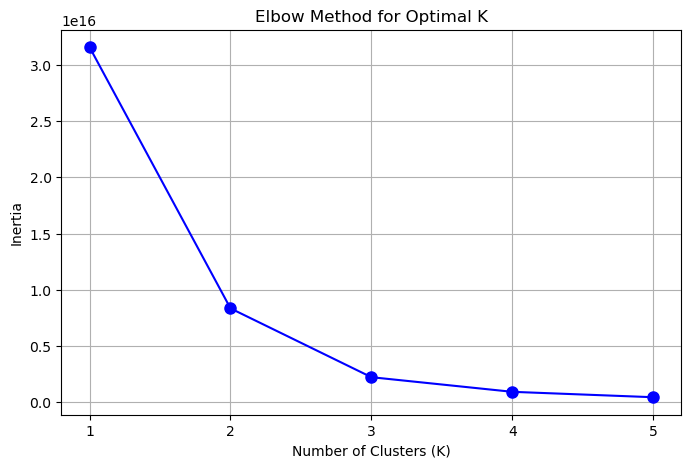

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []


# Loop through different K values
for k in ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=10) # Create a KMeans instance with k clusters
    model.fit(X) # Fit model to selected features specified above!
    inertias.append(model.inertia_) # Append the inertia (sum of squared distances) to the list

# Plot ks vs inertias
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, '-o', markersize=8, color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.xticks(ks)
plt.grid(True)
plt.show()

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
pipeline=make_pipeline(scaler, kmeans)
pipeline.fit(X)
#either use standard scaler OR normalizer

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [7]:
## PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # or more if needed
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

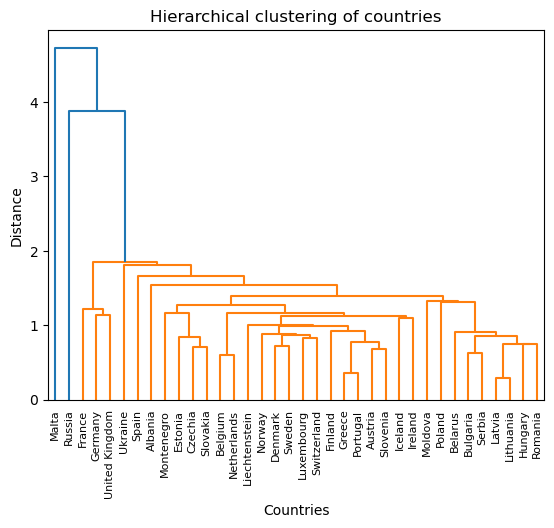

In [8]:
###hierarchical clustering with default (single) linkage
import scipy.cluster.hierarchy as sch

matrix_link1 = sch.linkage(X_scaled)


sch.dendrogram(matrix_link1, labels=df_eu["country_name"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical clustering of countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [9]:
#cutting at the largest distance between the merges, i.e. at distance 3 - this results in 3 clusters
df_eu["Cluster1"] = sch.fcluster(matrix_link1, t=3, criterion="distance")

with pd.option_context("display.max_colwidth", None):
    print(df_eu.groupby("Cluster1")["country_name"].apply(list))

Cluster1
1    [Austria, Belgium, France, Germany, Liechtenstein, Luxembourg, Netherlands, Switzerland, Belarus, Bulgaria, Czechia, Hungary, Moldova, Poland, Romania, Slovakia, Ukraine, Denmark, Estonia, Finland, Iceland, Ireland, Latvia, Lithuania, Norway, Sweden, United Kingdom, Albania, Greece, Montenegro, Portugal, Serbia, Slovenia, Spain]
2                                                                                                                                                                                                                                                                                                                                      [Russia]
3                                                                                                                                                                                                                                                                                                                              

Single linkage does not seem to make a lot of sense as there are two clusters that only consist of a single country, and the third that includes all other countries.

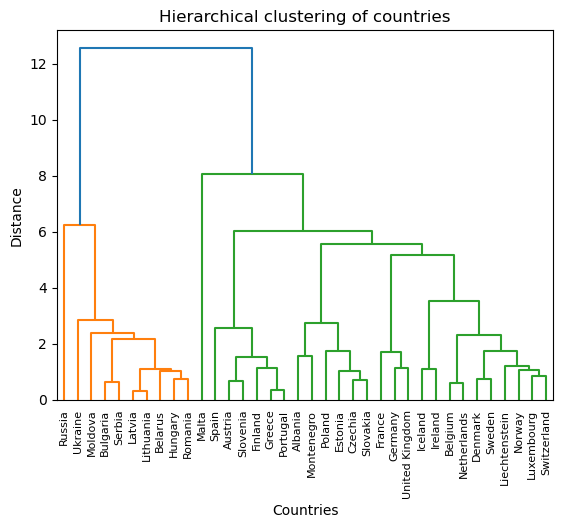

In [10]:
###hierarchical clustering with ward linkage
import scipy.cluster.hierarchy as sch

matrix_link2 = sch.linkage(X_scaled, method='ward')


sch.dendrogram(matrix_link2, labels=df_eu["country_name"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical clustering of countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [11]:
#cutting at the largest distance between the merges, i.e. at distance 10 
#this results in 2 clearly distinct clusters, for more detailed clusters one could cut at 7
df_eu["Cluster2"] = sch.fcluster(matrix_link2, t=10, criterion="distance")

with pd.option_context("display.max_colwidth", None):
    print(df_eu.groupby("Cluster2")["country_name"].apply(list))

Cluster2
1                                                                                                                                                                         [Belarus, Bulgaria, Hungary, Moldova, Romania, Russia, Ukraine, Latvia, Lithuania, Serbia]
2    [Austria, Belgium, France, Germany, Liechtenstein, Luxembourg, Netherlands, Switzerland, Czechia, Poland, Slovakia, Denmark, Estonia, Finland, Iceland, Ireland, Norway, Sweden, United Kingdom, Albania, Greece, Malta, Montenegro, Portugal, Slovenia, Spain]
Name: country_name, dtype: object


This shows more distinct clusters, that seem to make sense, however more detailed clusters would be more interesting.

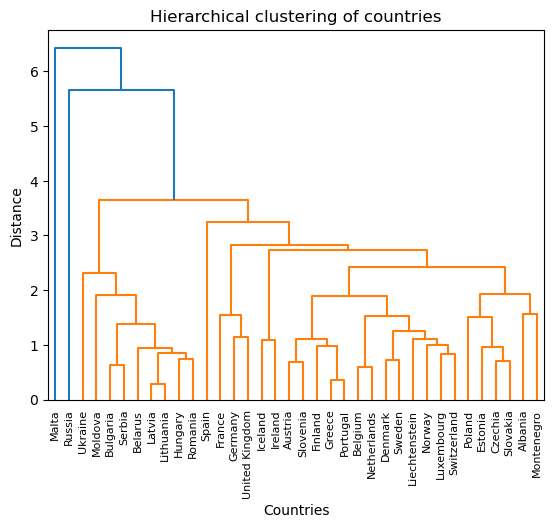

In [12]:
###hierarchical clustering with average linkage
import scipy.cluster.hierarchy as sch

matrix_link3 = sch.linkage(X_scaled, method='average')


sch.dendrogram(matrix_link3, labels=df_eu["country_name"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical clustering of countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [13]:
#cutting at the largest distance between the merges, i.e. at distance 5
#this results in 3 clusters
df_eu["Cluster3"] = sch.fcluster(matrix_link3, t=5, criterion="distance")

with pd.option_context("display.max_colwidth", None):
    print(df_eu.groupby("Cluster3")["country_name"].apply(list))

Cluster3
1    [Austria, Belgium, France, Germany, Liechtenstein, Luxembourg, Netherlands, Switzerland, Belarus, Bulgaria, Czechia, Hungary, Moldova, Poland, Romania, Slovakia, Ukraine, Denmark, Estonia, Finland, Iceland, Ireland, Latvia, Lithuania, Norway, Sweden, United Kingdom, Albania, Greece, Montenegro, Portugal, Serbia, Slovenia, Spain]
2                                                                                                                                                                                                                                                                                                                                      [Russia]
3                                                                                                                                                                                                                                                                                                                              

Here, again, there are two clusters, that consist of only a single country, which is not very helpful for interpretation. The third cluster is just the rest of the countries.

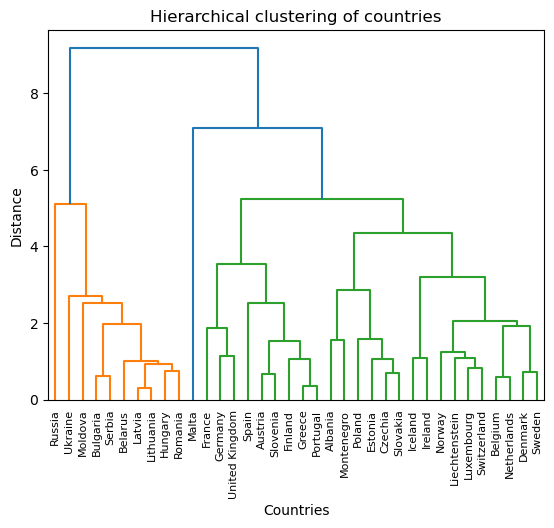

In [14]:
###hierarchical clustering with complete linkage
import scipy.cluster.hierarchy as sch

matrix_link4 = sch.linkage(X_scaled, method='complete')


sch.dendrogram(matrix_link4, labels=df_eu["country_name"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical clustering of countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [15]:
#cutting at the largest distance between the merges, i.e. at distance 6
#this results in 3 clusters
df_eu["Cluster4"] = sch.fcluster(matrix_link4, t=6, criterion="distance")

with pd.option_context("display.max_colwidth", None):
    print(df_eu.groupby("Cluster4")["country_name"].apply(list))

Cluster4
1                                                                                                                                                                  [Belarus, Bulgaria, Hungary, Moldova, Romania, Russia, Ukraine, Latvia, Lithuania, Serbia]
2    [Austria, Belgium, France, Germany, Liechtenstein, Luxembourg, Netherlands, Switzerland, Czechia, Poland, Slovakia, Denmark, Estonia, Finland, Iceland, Ireland, Norway, Sweden, United Kingdom, Albania, Greece, Montenegro, Portugal, Slovenia, Spain]
3                                                                                                                                                                                                                                                     [Malta]
Name: country_name, dtype: object


This shows similar results to the Ward method, but with Malta as a third cluster.
If you look at smaller distances and the smaller clusters, the countries are quite similar, which is what you ideally want in a cluster.
Overall, Malta almost always is its own cluster, similar to Russia. These two countries seem to differ distinctly from other European countries.

The complete method seems to make the most sense with this data, as we want clearly separated clusters with maximum distance between the points between clusters.

In the following, the clusters of complete linkage are going to be interpreted. In order to analyze in detail the cut is made at distance 4 which results in 6 clusters.


In [16]:
#cutting at the distance 4 easier for interpretation
df_eu["Cluster4"] = sch.fcluster(matrix_link4, t=4, criterion="distance")

with pd.option_context("display.max_colwidth", None):
    print(df_eu.groupby("Cluster4")["country_name"].apply(list))

Cluster4
1                           [Belarus, Bulgaria, Hungary, Moldova, Romania, Ukraine, Latvia, Lithuania, Serbia]
2                                                                                                     [Russia]
3                       [Austria, France, Germany, Finland, United Kingdom, Greece, Portugal, Slovenia, Spain]
4                                                    [Czechia, Poland, Slovakia, Estonia, Albania, Montenegro]
5    [Belgium, Liechtenstein, Luxembourg, Netherlands, Switzerland, Denmark, Iceland, Ireland, Norway, Sweden]
6                                                                                                      [Malta]
Name: country_name, dtype: object


In [17]:
df_eu.loc[df_eu['country_name'].isin(["Belarus", "Bulgaria", "Hungary", "Moldova", "Romania", "Ukraine", "Latvia", "Lithuania", "Serbia"])]

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km,Cluster1,Cluster2,Cluster3,Cluster4
8,Belarus,9.3,13.0,69.3,79.4,9380000.0,45.18,1,1,1,1
9,Bulgaria,8.5,18.0,69.9,77.5,6934000.0,62.47,1,1,1,1
11,Hungary,9.6,14.5,72.3,79.1,9750000.0,104.80,1,1,1,1
12,Moldova,9.8,11.8,67.7,76.3,2620000.0,77.41,1,1,1,1
14,Romania,9.2,15.4,70.5,78.4,19258000.0,80.78,1,1,1,1
17,Ukraine,7.8,15.9,66.4,76.2,44135000.0,73.13,1,1,1,1
23,Latvia,9.2,15.2,70.9,80.1,1900000.0,29.47,1,1,1,1
24,Lithuania,9.0,15.6,70.1,80.0,2795000.0,42.81,1,1,1,1
33,Serbia,8.9,16.9,71.4,77.2,6899000.0,78.08,1,1,1,1


#### Interpretation - Cluster 1
The countries in this cluster are all East-European. The birth rate ranges from 7.8 to 9.8 while the death rate ranges from 11.8 to 18.0. Male life expectancy is between 66.4 and 72.3 years for men and between 76.2 and 80.1 years for women. The populations have a bigger range from between 1.9 million and over 44.1 million inhabitants. Population density of these countries is between 29.47 and 104.80 inhabitants per square kilometer.

In [18]:
df_eu.loc[df_eu['country_name'] =="Russia"]

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km,Cluster1,Cluster2,Cluster3,Cluster4
15,Russia,9.8,14.6,66.5,76.4,144104000.0,8.428,2,1,2,2


#### Interpretation - Cluster 2
This cluster only consists of Russia. The birth and death rate and life expectancies are comparable to cluster 1. However, the reason it is set apart from the other countries is very likely the big population of over 144 million inhabitants in addition to the low population density of around 8 people per square kilometer.


In [19]:
df_eu.loc[df_eu['country_name'].isin(["Austria", "France", "Germany", "Finland", "United Kingdom", "Greece", "Portugal", "Slovenia", "Spain"
])]

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km,Cluster1,Cluster2,Cluster3,Cluster4
0,Austria,9.4,10.3,78.9,83.6,8917000.0,106.30,1,2,1,3
2,France,10.9,9.9,79.2,85.3,67380000.0,122.70,1,2,1,3
3,Germany,9.3,11.9,78.6,83.4,83161000.0,232.60,1,2,1,3
20,Finland,8.4,10.0,79.4,85.0,5530000.0,16.34,1,2,1,3
27,United Kingdom,10.2,10.4,79.0,82.9,67215000.0,275.90,1,2,1,3
29,Greece,7.9,12.2,78.6,83.7,10701000.0,81.09,1,2,1,3
32,Portugal,8.2,12.0,78.0,84.1,10297000.0,111.70,1,2,1,3
34,Slovenia,8.9,11.4,77.8,83.4,2102000.0,101.70,1,2,1,3
35,Spain,7.1,10.4,79.7,85.1,47363000.0,93.62,1,2,1,3


#### Interpretation - Cluster 3
The countries in this cluster are West-/South-European. The birth rate is between 7.1 and 10.9, while the death rate ranges from 9.9 to 12.2. The male life expectancy is between 77.8 and 79.7, the female life expectancy is between 82.9 and 85.4. Inhabitants range from just over 2 million to 83 million. The population density is between 16.3 and 275.9 inhabitants per square kilometer.

In [20]:
df_eu.loc[df_eu['country_name'].isin(["Czechia", "Poland", "Slovakia", "Estonia", "Albania", "Montenegro"
])]

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km,Cluster1,Cluster2,Cluster3,Cluster4
10,Czechia,10.3,12.1,75.3,81.3,10698000.0,135.60,1,2,1,4
13,Poland,9.4,12.6,72.6,80.8,37899000.0,121.20,1,2,1,4
16,Slovakia,10.4,10.8,73.5,80.4,5459000.0,111.30,1,2,1,4
19,Estonia,9.9,11.9,74.2,82.7,1329000.0,29.32,1,2,1,4
28,Albania,11.5,8.3,77.2,80.3,2838000.0,98.71,1,2,1,4
31,Montenegro,11.4,11.7,73.2,78.8,621306.0,44.99,1,2,1,4


#### Interpretation - Cluster 4
The countries in this cluster are located in Middle-/Eastern Europe. The birth rate is between 9.4 and 11.5, the death rate is between 8.3 and 12.6. Male life expectancy ranges from 72.6 to 77.2 years, female life expectancy ranges from 78.8 to 82.7. The populations are between around 600000 to over 37 million inhabitants. The population density is between 29 and 135 inhabitants per square kilometer.

In [21]:
df_eu.loc[df_eu['country_name'].isin(["Belgium", "Liechtenstein", "Luxembourg", "Netherlands", "Switzerland", "Denmark", "Iceland", "Ireland", "Norway", "Sweden"])]

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km,Cluster1,Cluster2,Cluster3,Cluster4
1,Belgium,9.9,11.0,78.6,83.1,11544000.0,378.100,1,2,1,5
4,Liechtenstein,9.1,8.2,80.1,83.6,38137.0,237.600,1,2,1,5
5,Luxembourg,10.2,7.3,79.4,84.2,630419.0,243.400,1,2,1,5
6,Netherlands,9.7,9.7,79.8,83.1,17442000.0,419.800,1,2,1,5
7,Switzerland,9.9,8.8,81.1,85.2,8637000.0,209.200,1,2,1,5
18,Denmark,10.4,9.4,79.6,83.6,5831000.0,135.900,1,2,1,5
21,Iceland,12.3,6.3,81.7,84.5,366463.0,3.558,1,2,1,5
22,Ireland,11.2,6.4,80.4,84.1,4986000.0,70.940,1,2,1,5
25,Norway,9.8,7.5,81.6,84.9,5379000.0,13.970,1,2,1,5
26,Sweden,10.9,9.5,80.7,84.2,10353000.0,23.140,1,2,1,5


#### Interpretation - Cluster 5
This cluster includes the Scandinavian countries, and the richer Western European countries. The birth rate ranges from 9.1 to 12.3 and the death rate ranges from 6.3 to 11.0. The life expectancies are quite high with men living between 79.4 and 81.7 years and women living between 83.1 and 85.2 years. Populations range from 38137 to over 17 million. The population density is between 3 and 419 inhabitants per square kilometer. 

In [22]:
df_eu.loc[df_eu['country_name'] =="Malta"]

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km,Cluster1,Cluster2,Cluster3,Cluster4
30,Malta,8.6,7.9,80.8,84.6,515332.0,1610.0,3,2,3,6


#### Interpretation - Cluster 6
This cluster only consists of Malta. The birth and death rates are on the lower end amongst the European countries, but not out of the ordinary. The life expectancies are comparable those of Cluster 5. The population with just over half a million is very low, with only a handful of countries having a smaller population. The main reason for Malta being its own cluster is likely the extraordinarily high population density of 1610 inhabitants per square kilometer. The second largest population density would be the Netherlands with 419.8 inhabitants per square kilometres which shows just how big of an outlier Malta is.